<a href="https://colab.research.google.com/github/iasolb/ECON3916-Statistics-MachineLearning/blob/main/Lab3/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World), JAM (Jamaica)
country_codes = ['PER', 'UMC', 'WLD']
country_code = country_codes[0]
country_name = "Peru"
income_bracket = country_codes[1]
indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [69]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs(country_code, axis=1, level=0).copy()

Fetching data...


In [70]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

In [71]:
df_gtm

series,Inflation_CPI,Tax_Rev_GDP,Gov_Exp_GDP,Exports_GDP,Gross_Cap_Formation,Imports_GDP,GDP_Const,GDP_Per_Capita_Const,Gross_Dom_Savings,Labor_Part_Rate,Labor_Force_Total,Unemployment_Rate,Natural_Rate_Unemp,Productivity,NCO,Budget_Balance
Year,,,,,,,,,,,,,,,,
2000,3.757338,12.608647,11.450627,16.768374,19.627985,18.769658,8.740938e+10,3286.273085,17.626700,65.780,11421931.0,4.958,NaN,7652.767230,-2.001285,1.158021
2001,1.977099,12.897106,11.717171,16.601380,18.159505,18.463022,8.794948e+10,3261.664251,16.297863,68.790,12219945.0,5.063,NaN,7197.207116,-1.861642,1.179935
2002,0.193135,12.487143,11.165026,17.274808,17.968146,17.974373,9.274583e+10,3398.749914,17.268580,69.905,12684641.0,4.840,NaN,7311.663388,-0.699566,1.322117
2003,2.259378,13.411521,11.518717,19.014667,17.510289,18.609943,9.660871e+10,3502.791657,17.915013,70.997,13141062.0,4.150,NaN,7351.666879,0.404724,1.892805
2004,3.662473,13.663369,11.256279,22.912234,16.855683,19.023845,1.013988e+11,3640.602999,20.744072,72.065,13588521.0,4.710,4.7442,7462.089983,3.888389,2.407090
2005,1.616302,14.104742,11.444512,26.848761,17.283818,20.508556,1.077717e+11,3835.132193,23.624022,73.109,14024578.0,4.870,4.7266,7684.490761,6.340205,2.660230
2006,2.002258,15.669988,10.916695,30.536636,19.650602,21.248420,1.158858e+11,4091.362686,28.938819,76.140,14840428.0,4.170,4.5480,7808.788640,9.288217,4.753293
2007,1.779986,16.407468,10.455030,31.522117,22.032387,24.165997,1.257574e+11,4407.791217,29.388507,78.228,15475880.0,4.080,4.3960,8126.023494,7.356120,5.952438
2008,5.785876,16.512171,10.370862,29.727630,26.178346,28.706137,1.372347e+11,4778.526422,27.199839,78.223,15688718.0,4.030,4.3720,8747.349288,1.021493,6.141309


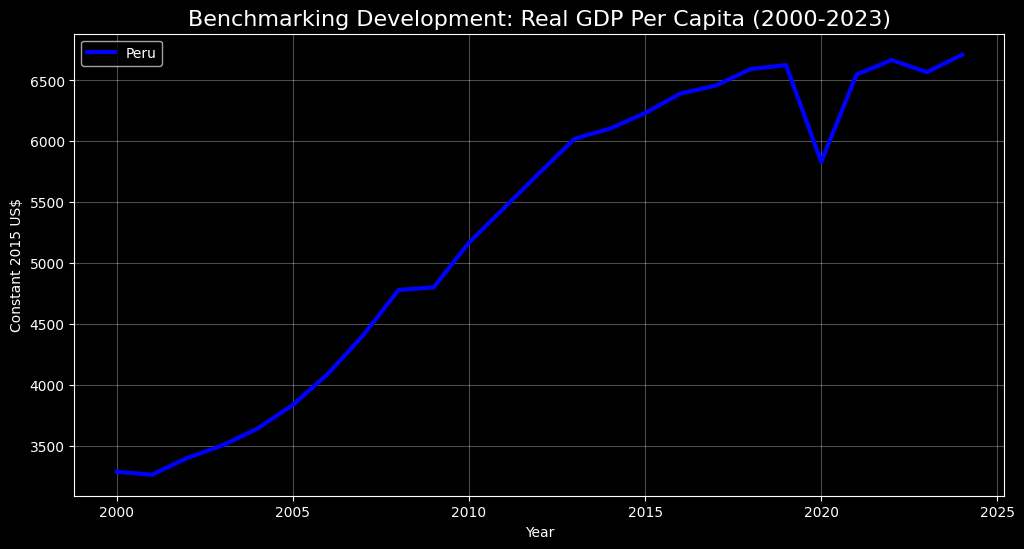

In [72]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[(country_code, 'GDP_Per_Capita_Const')], label=country_name, color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

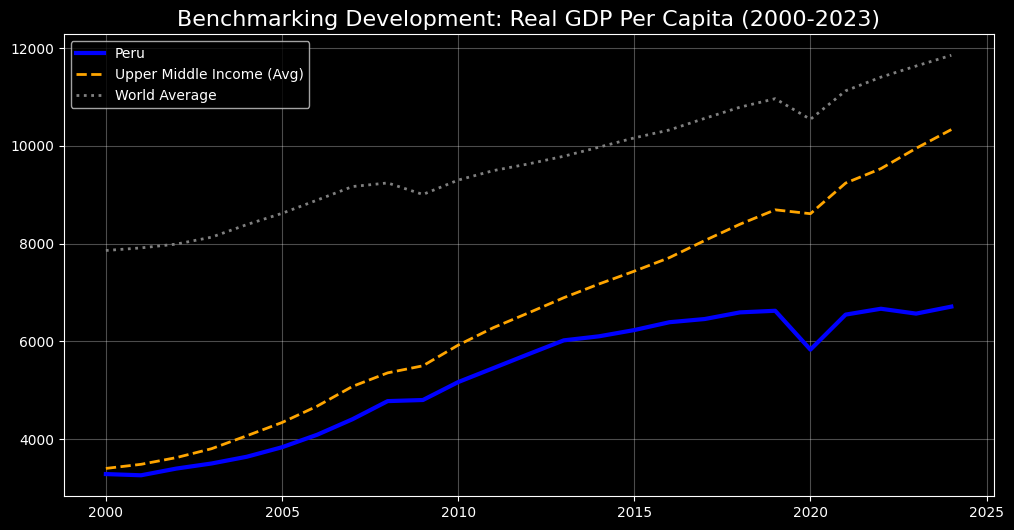

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[(country_code, 'GDP_Per_Capita_Const')], label=country_name, color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[(income_bracket, 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

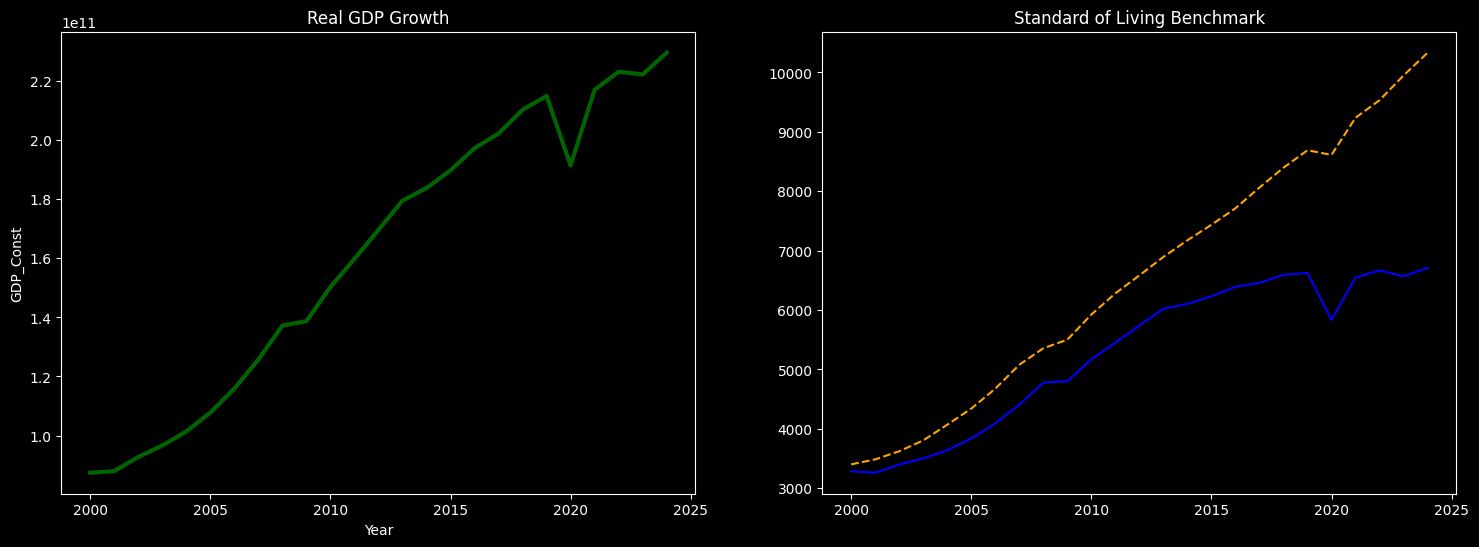

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[(country_code, 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[(income_bracket, 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

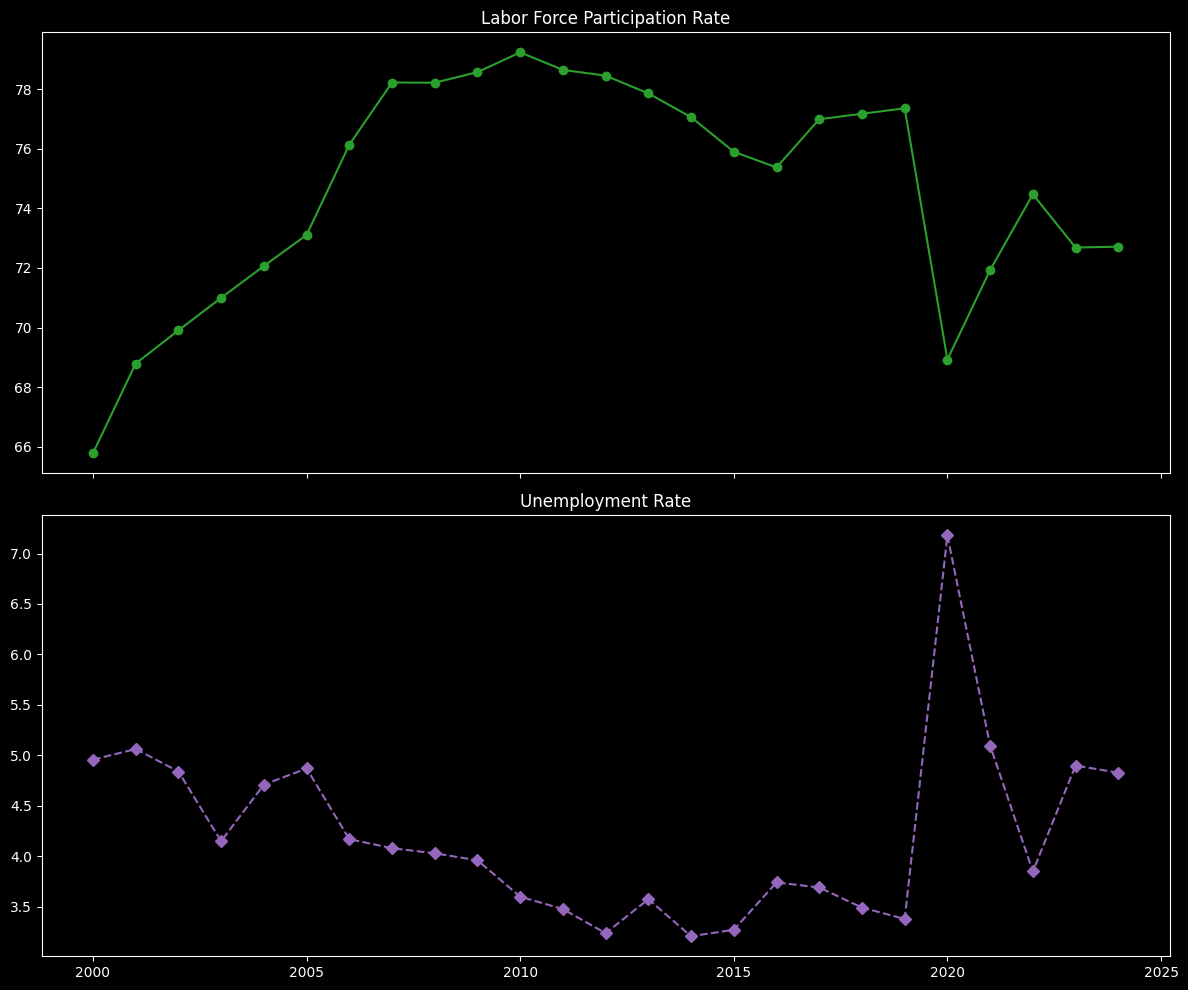

In [76]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

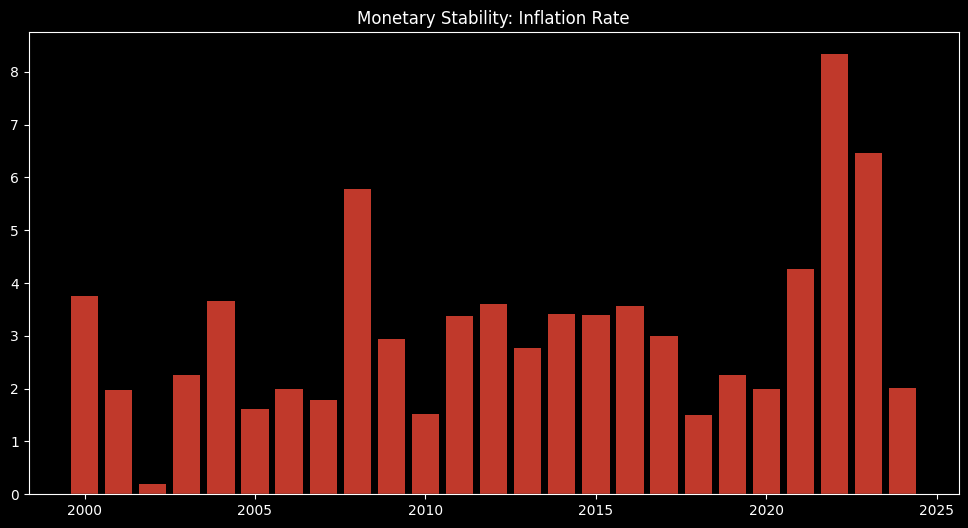

In [77]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

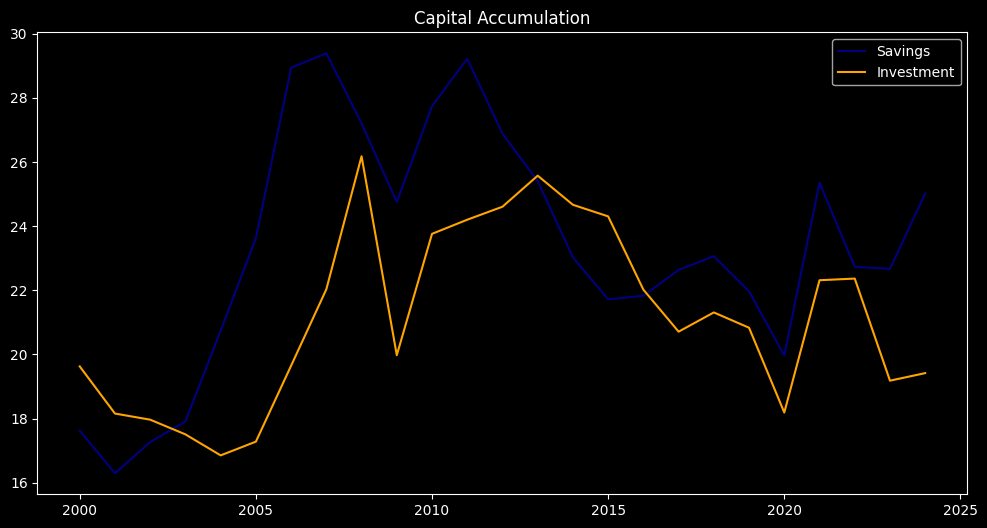

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

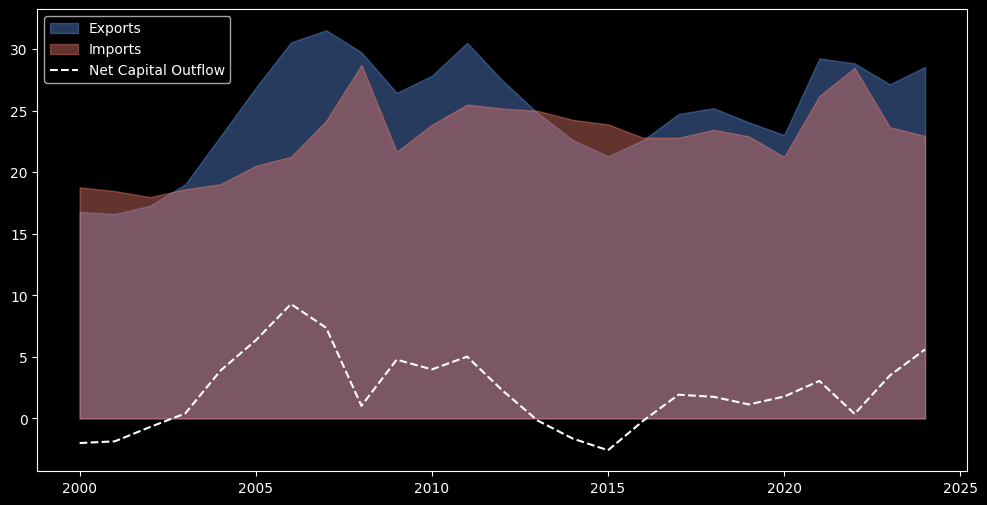

In [80]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='white', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

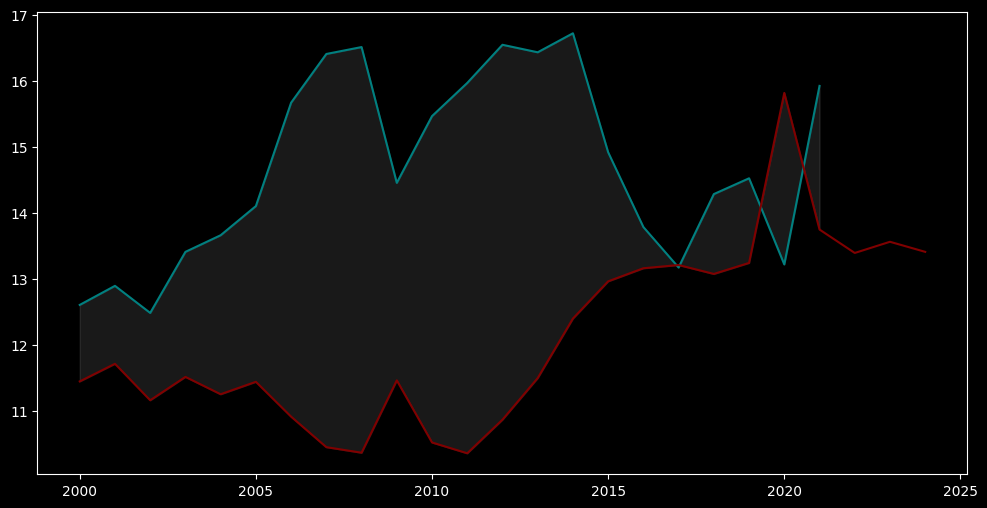

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

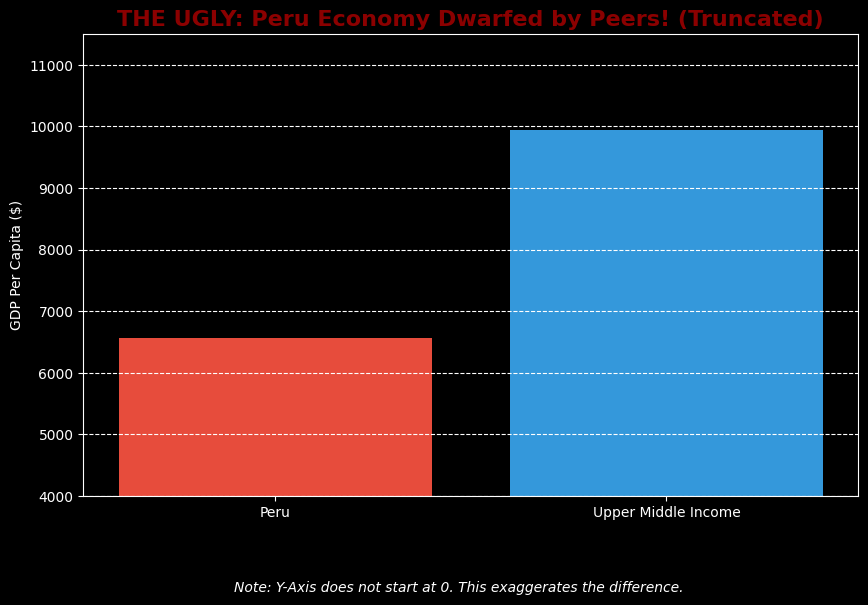

In [83]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
gtm_val = df.loc[snapshot_year, (country_code, 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, (income_bracket, 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = [country_name, 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Peru Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

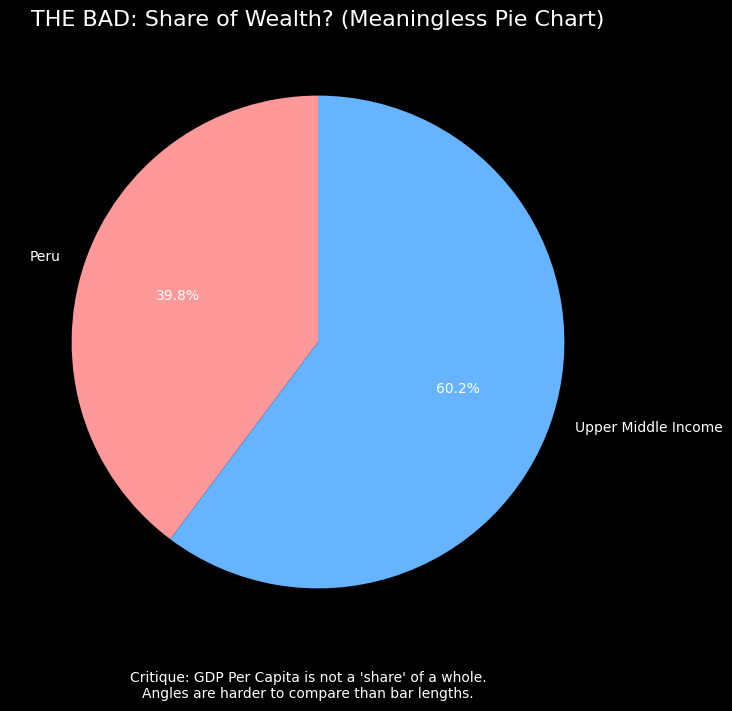

In [84]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

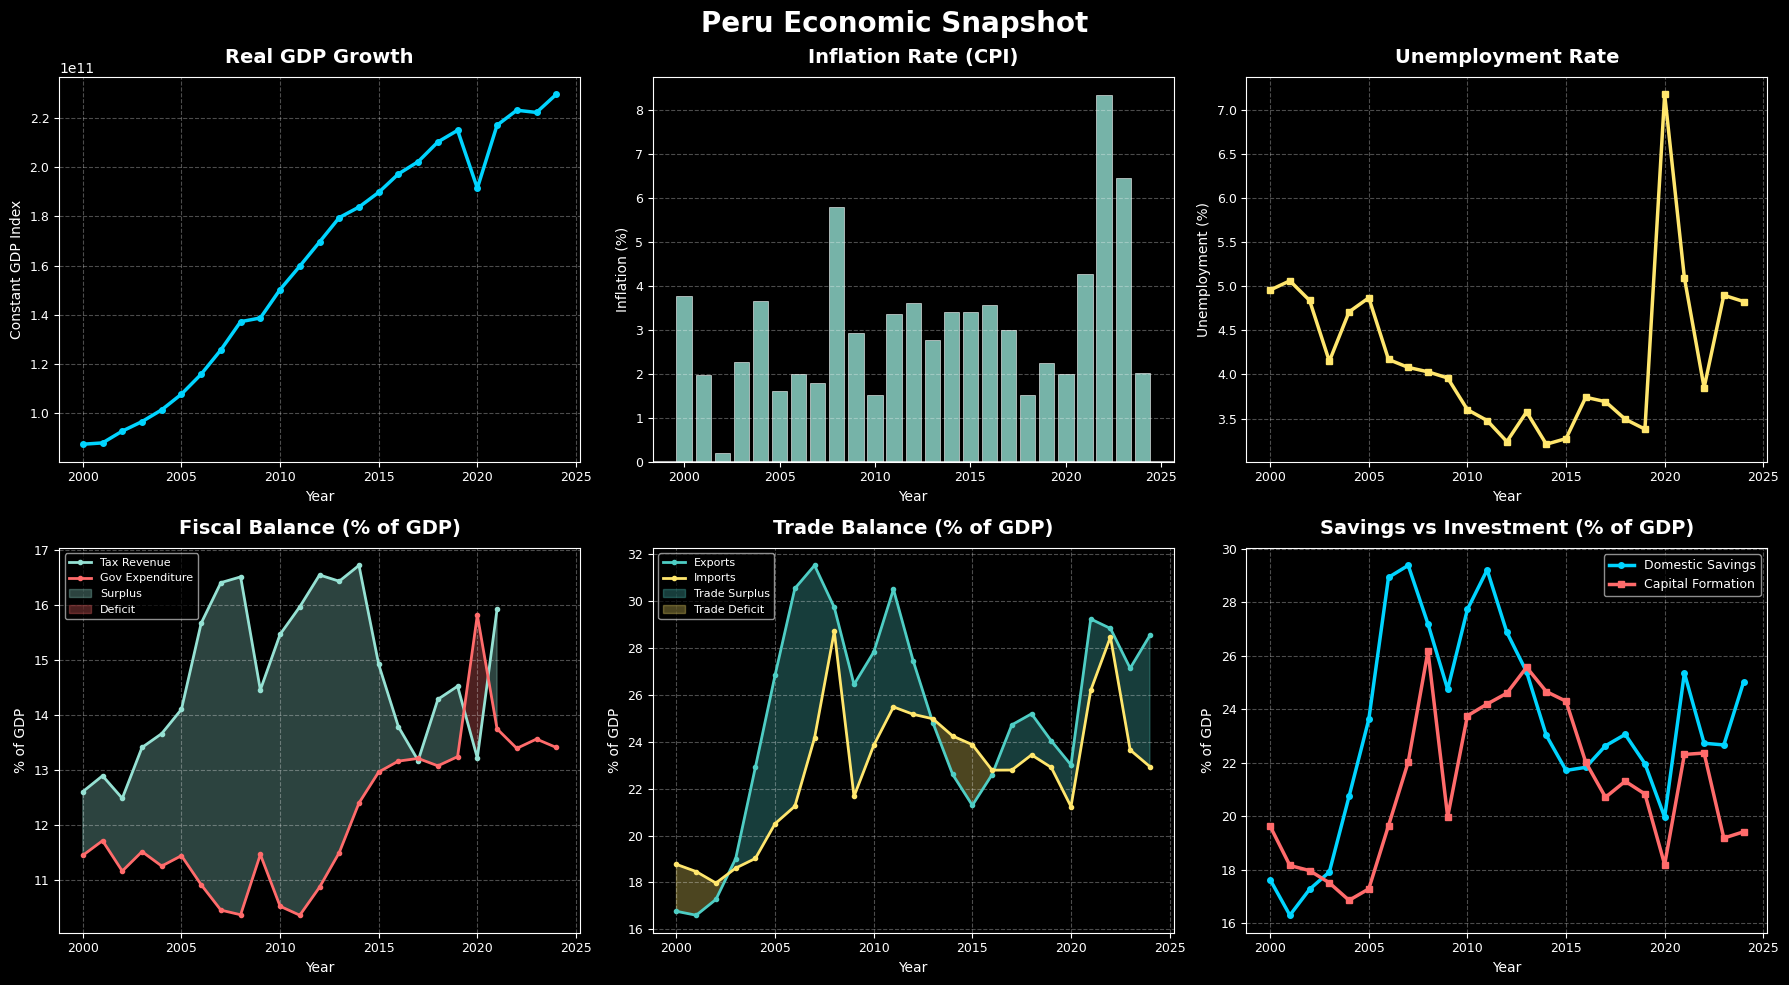

In [86]:
import matplotlib.pyplot as plt

# Set the dark background style
plt.style.use('dark_background')

# Create the figure with 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle(f'Peru Economic Snapshot', fontsize=20, fontweight='bold', y=0.98)

# Color palette
colors = {
    'primary': '#00d4ff',
    'secondary': '#ff6b6b',
    'accent': '#4ecdc4',
    'warning': '#ffe66d',
    'success': '#95e1d3'
}

# ============================================
# TOP LEFT: Real GDP (Line chart)
# ============================================
ax1 = axes[0, 0]
ax1.plot(df_gtm.index, df_gtm['GDP_Const'],
         color=colors['primary'], linewidth=2.5, marker='o', markersize=4)
ax1.set_title('Real GDP Growth', fontsize=14, fontweight='bold', pad=10)
ax1.set_xlabel('Year', fontsize=10)
ax1.set_ylabel('Constant GDP Index', fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(labelsize=9)

# ============================================
# TOP MIDDLE: Inflation Rate (Bar chart with horizontal line at 0)
# ============================================
ax2 = axes[0, 1]
bar_colors = [colors['secondary'] if x < 0 else colors['success'] for x in df_gtm['Inflation_CPI']]
ax2.bar(df_gtm.index, df_gtm['Inflation_CPI'],
        color=bar_colors, alpha=0.8, edgecolor='white', linewidth=0.5)
ax2.axhline(y=0, color='white', linestyle='-', linewidth=1.5, alpha=0.7)
ax2.set_title('Inflation Rate (CPI)', fontsize=14, fontweight='bold', pad=10)
ax2.set_xlabel('Year', fontsize=10)
ax2.set_ylabel('Inflation (%)', fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')
ax2.tick_params(labelsize=9)

# ============================================
# TOP RIGHT: Unemployment Rate (Line chart)
# ============================================
ax3 = axes[0, 2]
ax3.plot(df_gtm.index, df_gtm['Unemployment_Rate'],
         color=colors['warning'], linewidth=2.5, marker='s', markersize=4)
ax3.set_title('Unemployment Rate', fontsize=14, fontweight='bold', pad=10)
ax3.set_xlabel('Year', fontsize=10)
ax3.set_ylabel('Unemployment (%)', fontsize=10)
ax3.grid(True, alpha=0.3, linestyle='--')
ax3.tick_params(labelsize=9)

# ============================================
# BOTTOM LEFT: Fiscal Balance (Fill area between Tax Revenue and Gov Expenditure)
# ============================================
ax4 = axes[1, 0]
ax4.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'],
         color=colors['success'], linewidth=2, label='Tax Revenue', marker='o', markersize=3)
ax4.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'],
         color=colors['secondary'], linewidth=2, label='Gov Expenditure', marker='o', markersize=3)
ax4.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                 where=(df_gtm['Tax_Rev_GDP'] >= df_gtm['Gov_Exp_GDP']),
                 color=colors['success'], alpha=0.3, interpolate=True, label='Surplus')
ax4.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                 where=(df_gtm['Tax_Rev_GDP'] < df_gtm['Gov_Exp_GDP']),
                 color=colors['secondary'], alpha=0.3, interpolate=True, label='Deficit')
ax4.set_title('Fiscal Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax4.set_xlabel('Year', fontsize=10)
ax4.set_ylabel('% of GDP', fontsize=10)
ax4.legend(loc='best', fontsize=8, framealpha=0.7)
ax4.grid(True, alpha=0.3, linestyle='--')
ax4.tick_params(labelsize=9)

# ============================================
# BOTTOM MIDDLE: Trade Balance (Fill area between Exports and Imports)
# ============================================
ax5 = axes[1, 1]
ax5.plot(df_gtm.index, df_gtm['Exports_GDP'],
         color=colors['accent'], linewidth=2, label='Exports', marker='o', markersize=3)
ax5.plot(df_gtm.index, df_gtm['Imports_GDP'],
         color=colors['warning'], linewidth=2, label='Imports', marker='o', markersize=3)
ax5.fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                 where=(df_gtm['Exports_GDP'] >= df_gtm['Imports_GDP']),
                 color=colors['accent'], alpha=0.3, interpolate=True, label='Trade Surplus')
ax5.fill_between(df_gtm.index, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                 where=(df_gtm['Exports_GDP'] < df_gtm['Imports_GDP']),
                 color=colors['warning'], alpha=0.3, interpolate=True, label='Trade Deficit')
ax5.set_title('Trade Balance (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax5.set_xlabel('Year', fontsize=10)
ax5.set_ylabel('% of GDP', fontsize=10)
ax5.legend(loc='best', fontsize=8, framealpha=0.7)
ax5.grid(True, alpha=0.3, linestyle='--')
ax5.tick_params(labelsize=9)

# ============================================
# BOTTOM RIGHT: Savings vs Investment (Dual lines)
# ============================================
ax6 = axes[1, 2]
ax6.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'],
         color=colors['primary'], linewidth=2.5, label='Domestic Savings', marker='o', markersize=4)
ax6.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'],
         color=colors['secondary'], linewidth=2.5, label='Capital Formation', marker='s', markersize=4)
ax6.set_title('Savings vs Investment (% of GDP)', fontsize=14, fontweight='bold', pad=10)
ax6.set_xlabel('Year', fontsize=10)
ax6.set_ylabel('% of GDP', fontsize=10)
ax6.legend(loc='best', fontsize=9, framealpha=0.7)
ax6.grid(True, alpha=0.3, linestyle='--')
ax6.tick_params(labelsize=9)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()